# Analisis calidad del aire (Jesus Morillo)

In [279]:
import pandas as pd

data = pd.read_csv(r"D:\Documentos\Visual Code\Análisis de la calidad del aire\air-quality-data.csv")

data

,DateTime,PM2.5
0,01/01/2018 00:00,90.19
1,01/01/2018 01:00,86.98
2,01/01/2018 02:00,86.06
3,01/01/2018 03:00,94.04
4,01/01/2018 04:00,108.78
...,...,...
31856,31/12/2021 19:00,72.25
31857,31/12/2021 20:00,71.56
31858,31/12/2021 21:00,70.27
31859,31/12/2021 22:00,66.78


In [280]:

data['DateTime'] = pd.to_datetime(data['DateTime'], format="%d/%m/%Y %H:%M")

# Muestra el DataFrame 'data'
data

,DateTime,PM2.5
0,2018-01-01 00:00:00,90.19
1,2018-01-01 01:00:00,86.98
2,2018-01-01 02:00:00,86.06
3,2018-01-01 03:00:00,94.04
4,2018-01-01 04:00:00,108.78
...,...,...
31856,2021-12-31 19:00:00,72.25
31857,2021-12-31 20:00:00,71.56
31858,2021-12-31 21:00:00,70.27
31859,2021-12-31 22:00:00,66.78


In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  31861 non-null  datetime64[ns]
 1   PM2.5     31861 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 498.0 KB


# muestra la contaminación promedio anual con un gráfico de líneas

In [282]:
data.head()

data['Year'] = data.DateTime.dt.year

data

,DateTime,PM2.5,Year
0,2018-01-01 00:00:00,90.19,2018
1,2018-01-01 01:00:00,86.98,2018
2,2018-01-01 02:00:00,86.06,2018
3,2018-01-01 03:00:00,94.04,2018
4,2018-01-01 04:00:00,108.78,2018
...,...,...,...
31856,2021-12-31 19:00:00,72.25,2021
31857,2021-12-31 20:00:00,71.56,2021
31858,2021-12-31 21:00:00,70.27,2021
31859,2021-12-31 22:00:00,66.78,2021


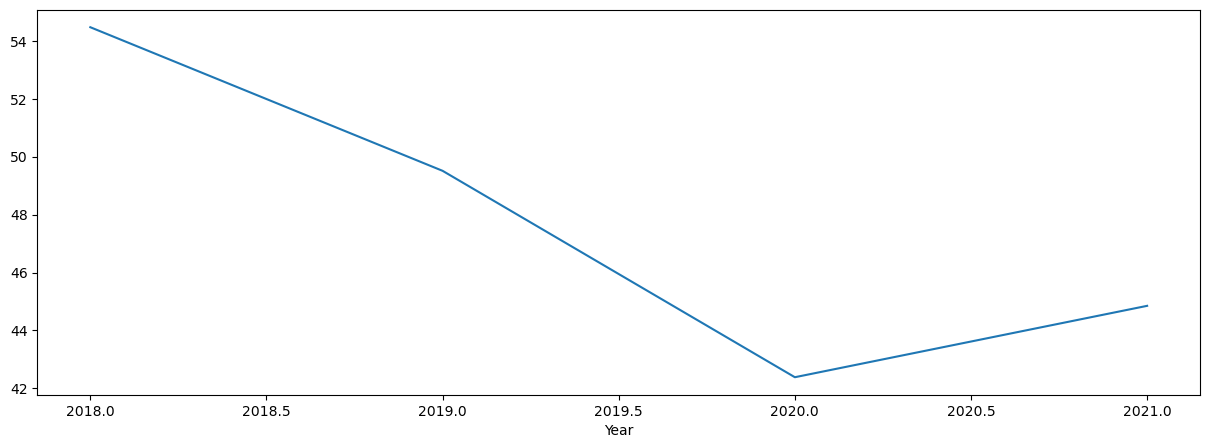

In [283]:
year_avg = data.groupby("Year") ['PM2.5'].mean()

year_avg

year_avg.plot(kind = 'line', figsize =(15,5));



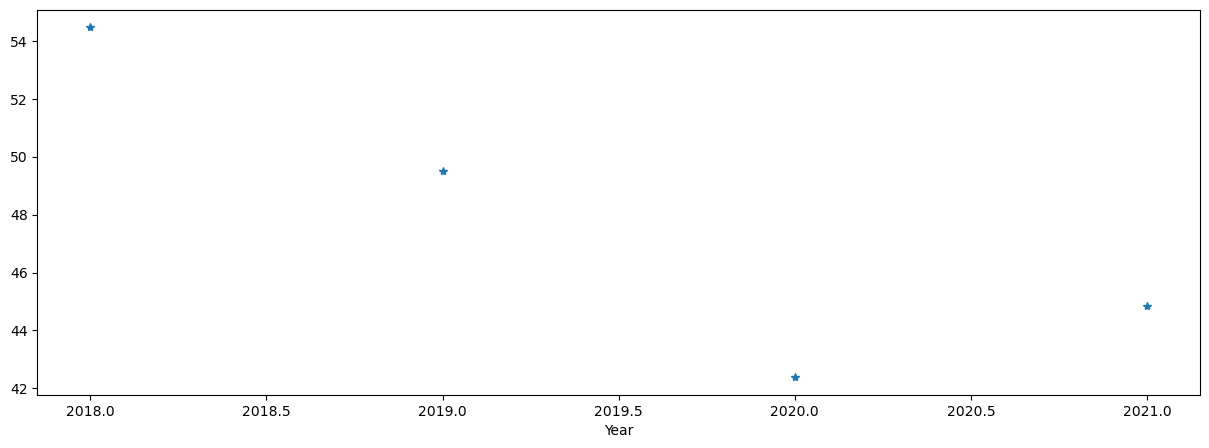

In [284]:
year_avg.plot(kind = 'line', figsize =(15,5), style = '*');

# Dibuje el gráfico de área que muestre la contaminación promedio mensual

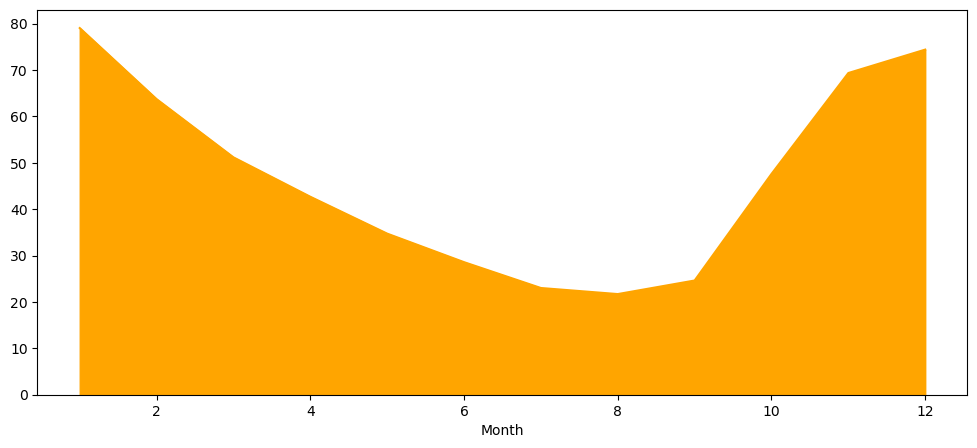

In [285]:
data['Month'] = data.DateTime.dt.month


month_avg = data.groupby('Month')['PM2.5'].mean()

month_avg.plot(kind = 'area', figsize=(12,5), color = 'orange');


# Dibuje un gráfico de barras para mostrar la contaminación promedio por hora

<Axes: xlabel='Hour'>

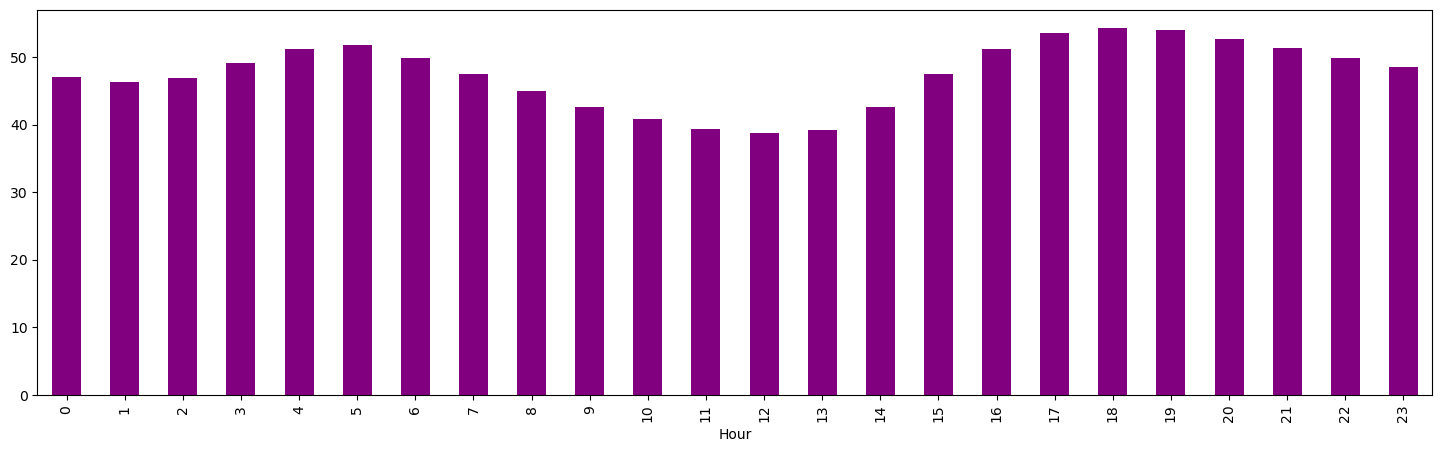

In [286]:
data['Hour'] = data.DateTime.dt.hour

hour_avg = data.groupby('Hour')['PM2.5'].mean()

hour_avg.plot(kind='bar', figsize=(18, 5), color = 'purple')

# Generalmente, ¿en qué mes se registró el aire como "Muy insalubre"?

In [287]:
x = data [(data['PM2.5'] >= 150.5) & (data['PM2.5'] <= 250.4)]

x.value_counts('Month')

Month
7     7
1     6
11    6
10    5
8     3
6     1
Name: count, dtype: int64

# Normalmente, ¿en qué mes/es el aire estaba fresco (bueno)?

In [288]:
y = data [data['PM2.5'] <= 12.0]

y.value_counts('Month')

Month
8    33
9     8
7     6
6     5
Name: count, dtype: int64

# En el año 2018 cuantas veces el ICA se registró "MODERADO"

In [289]:
z = data[(data['Year'] == 2018) & (data['PM2.5'] >= 12.1) & (data['PM2.5']<= 35.4)]

z.Year.unique()

z['PM2.5']

1820     33.34
2038     35.39
2215     28.90
2306     34.83
2307     33.50
         ...  
9981     19.75
9982     19.27
9983     18.96
10004    17.45
10006    18.77
Name: PM2.5, Length: 2239, dtype: float64

# ¿Cómo estuvo el tiempo en el mes de junio y julio?

In [290]:
data.head()

data [data['Month'] == 1]['PM2.5'].mean()

79.05861149110807

In [291]:
data [data['Month'] == 7]['PM2.5'].mean()

23.010723793677204